<h1>Zadanie 1<h1>

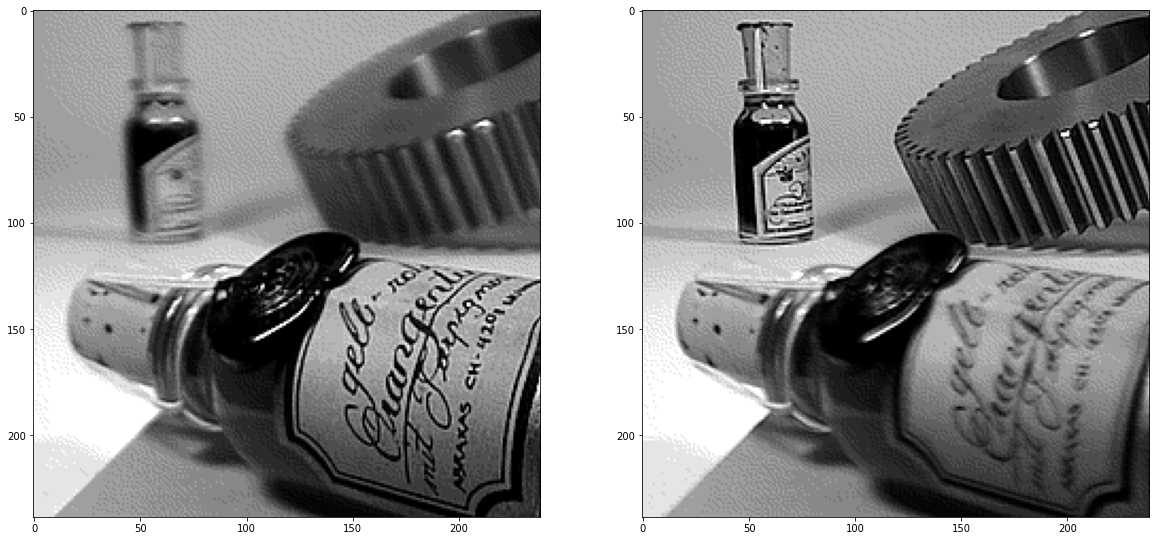

In [1]:
from skimage import io
import matplotlib.pyplot as plt

left_image = io.imread("left.png")
right_image = io.imread("right.png")

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(left_image, cmap = 'gray')
axes[1].imshow(right_image, cmap = 'gray')

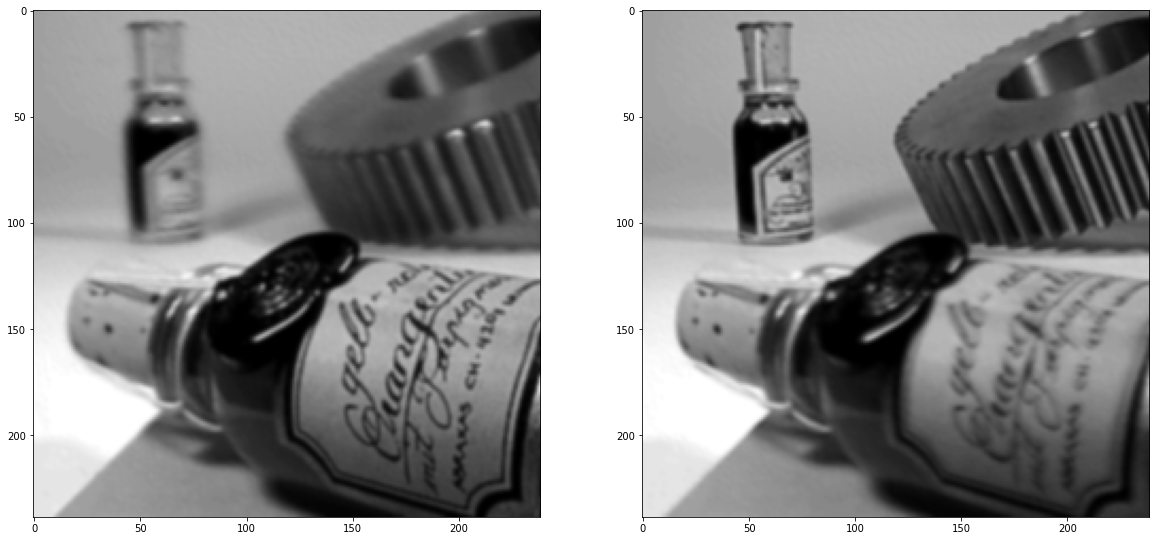

In [2]:
from skimage.filters import gaussian

left_gaussian_image = gaussian(left_image)
right_gaussian_image = gaussian(right_image)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(left_gaussian_image, cmap = 'gray')
axes[1].imshow(right_gaussian_image, cmap = 'gray')

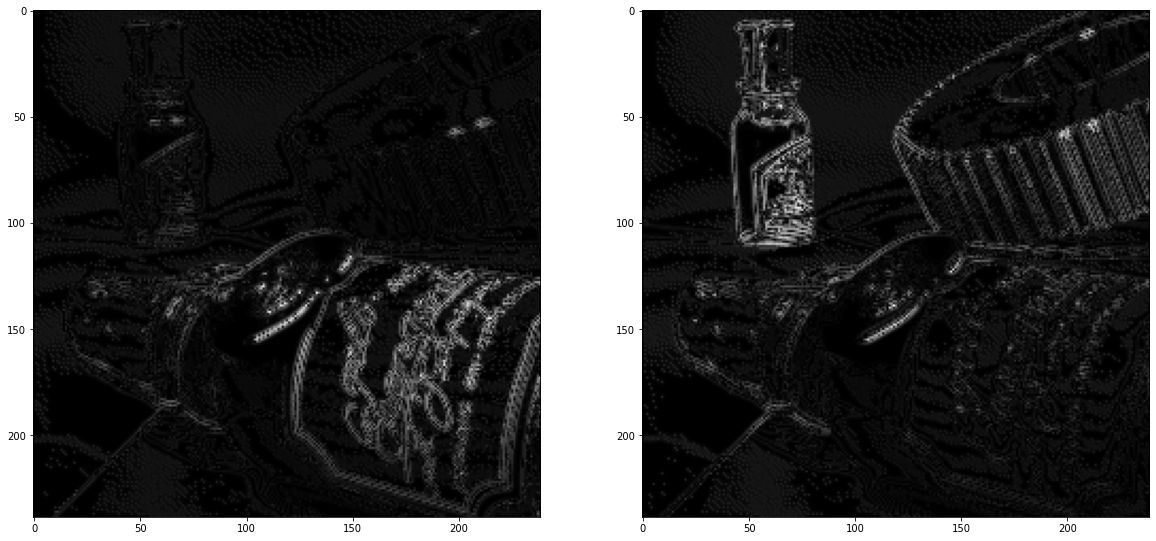

In [3]:
from skimage.util import img_as_ubyte, compare_images

left_diff = img_as_ubyte(compare_images(left_image, left_gaussian_image, method='diff'))
right_diff = img_as_ubyte(compare_images(right_image, right_gaussian_image, method='diff'))

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(left_diff, cmap = 'gray')
axes[1].imshow(right_diff, cmap = 'gray')

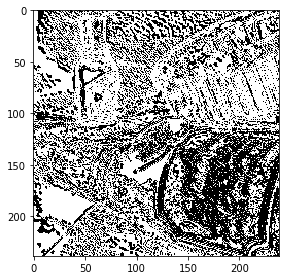

In [4]:
import numpy as np

map_image = np.zeros(left_image.shape)

for i in range(left_image.shape[0]):
    for j in range(left_image.shape[1]):
        if left_diff[i, j] > right_diff[i, j]:
            map_image[i, j] = 0
        else:
            map_image[i, j] = 1

io.imshow(map_image, cmap='gray')

g:\Mateusz\PROGRAMOWANIE\VS Code\PSIO\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


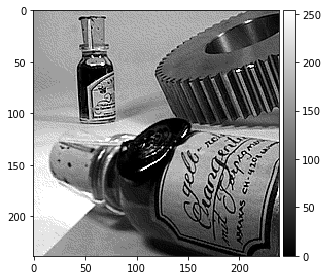

In [5]:
image = np.zeros(map_image.shape)

for i in range(map_image.shape[0]):
    for j in range(map_image.shape[1]):
        if map_image[i, j] == 0:
            image[i, j] = left_image[i, j]
        else:
            image[i, j] = right_image[i, j]

io.imshow(image, cmap='gray')

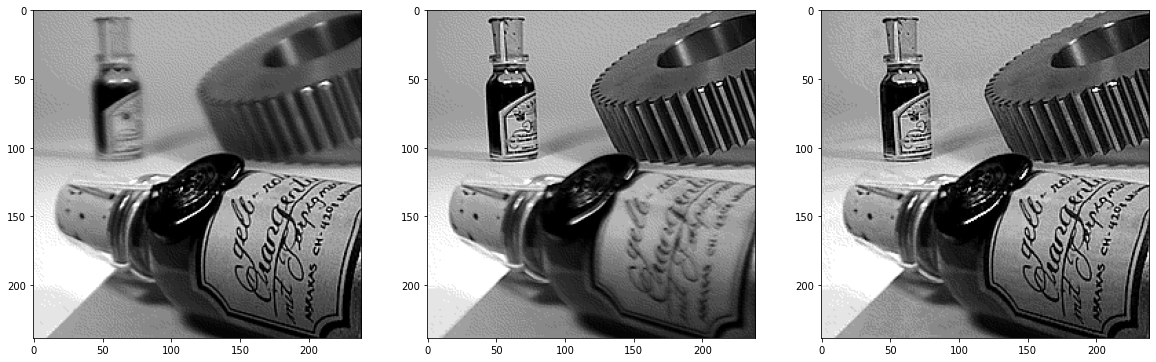

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].imshow(left_image, cmap = 'gray')
axes[1].imshow(right_image, cmap = 'gray')
axes[2].imshow(image, cmap = 'gray')

<h1>Zadanie 2<h1>

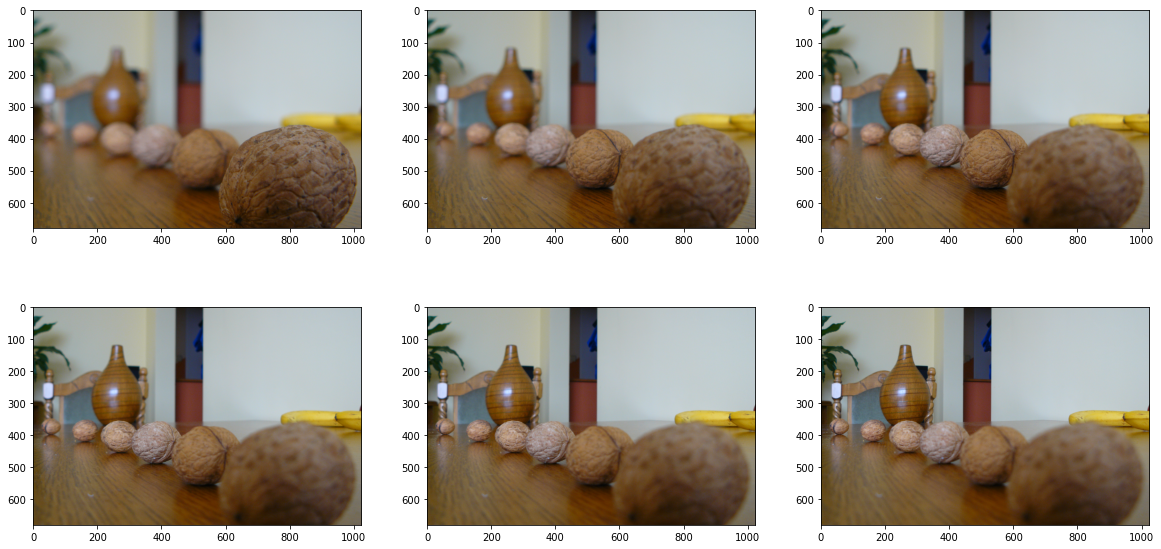

In [7]:
image_1 = io.imread('1.png').astype(np.uint8)
image_2 = io.imread('2.png').astype(np.uint8)
image_3 = io.imread('3.png').astype(np.uint8)
image_4 = io.imread('4.png').astype(np.uint8)
image_5 = io.imread('5.png').astype(np.uint8)
image_6 = io.imread('6.png').astype(np.uint8)

fig, axes = plt.subplots(2, 3, figsize=(20,10))

axes[0, 0].imshow(image_1)
axes[0, 1].imshow(image_2)
axes[0, 2].imshow(image_3)
axes[1, 0].imshow(image_4)
axes[1, 1].imshow(image_5)
axes[1, 2].imshow(image_6)

images = []
images.append(image_1)
images.append(image_2)
images.append(image_3)
images.append(image_4)
images.append(image_5)
images.append(image_6)

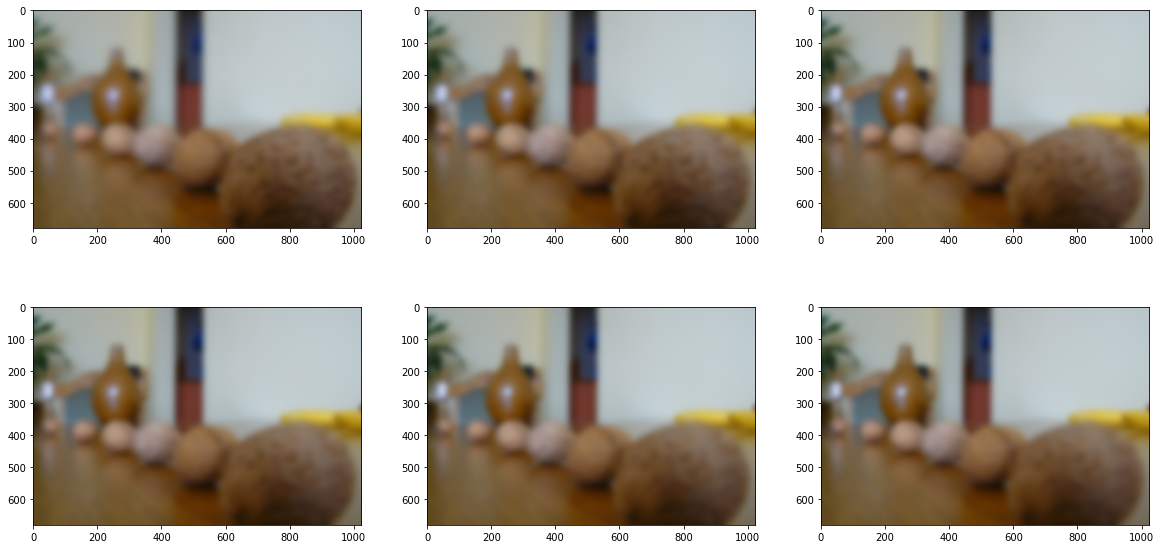

In [8]:
gauss_images = []

for i in range(len(images)):
    new_image = np.zeros(images[i].shape).astype(np.uint8)
    for j in range(3):
        new_image[..., j] = img_as_ubyte(gaussian(images[i][..., j], sigma=10))
    gauss_images.append(new_image)

fig, axes = plt.subplots(2, 3, figsize=(20,10))

count = 0
for i in range(2):
    for j in range(3):
        axes[i][j].imshow(gauss_images[count])
        count += 1


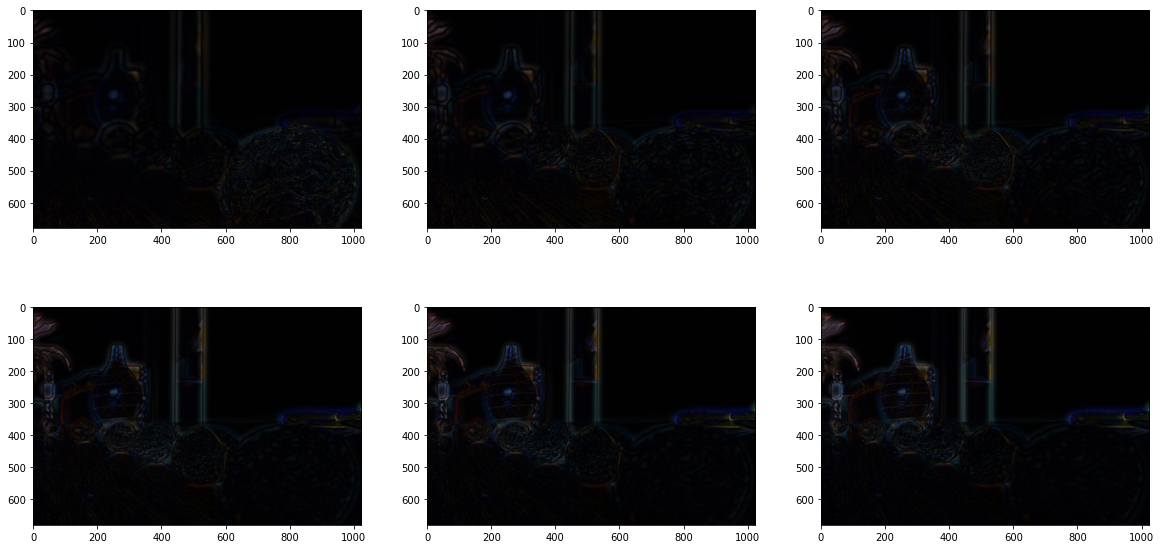

In [9]:
difference_images = []

for i in range(len(images)):
    difference_images.append(compare_images(images[i], gauss_images[i], method='diff'))
    
fig, axes = plt.subplots(2, 3, figsize=(20,10))

count = 0
for i in range(2):
    for j in range(3):
        axes[i][j].imshow(difference_images[count])
        count += 1

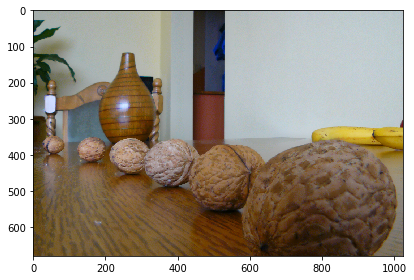

In [12]:

result = np.zeros(images[0].shape).astype(np.uint8)
for x in range(images[0].shape[0]):
    for y in range(images[0].shape[1]):
        for z in range(3):
            big_val = 0
            big_val_ind = 0
            for i in range(len(images)):
                if big_val < difference_images[i][x, y, z]:
                    big_val = difference_images[i][x, y, z]
                    big_val_ind = i
            result[x, y, z] = images[big_val_ind][x, y, z]
        
io.imshow(result)